In [1]:
import functions as fn
import pandas as pd
from importlib import reload
from tqdm import tqdm
from termcolor import colored
import matplotlib.pyplot as plt
from ooipy.tools import ooiplotlib as ooiplt
import ooipy
import numpy as np
from datetime import datetime

In [17]:
df = pd.read_csv('E:/Acer backup 3/internships and jobs/UW/Reader grader and TA/Shima Abadi/Data/ais_2014B_2020B_V2.csv',sep = ',')

df['TIMESTAMP UTC']=df['TIMESTAMP UTC'].astype('datetime64[ns]')

### Created new groups for all the vessel types

In [60]:
vessels=pd.read_csv('Vessels/vessel_groups.csv')

In [19]:
vessels.head()

,sl no,vessel,group3,group4,isolated_axial_calderas
0,0,Asphalt/Bitumen Tanker,NaN,NaN,0
1,1,Bulk Carrier,Bulk,Cargo typeC,1
2,2,Buoy-Laying Vessel,NaN,NaN,0
3,3,Cable Layer,NaN,NaN,0
4,4,Cargo,Dry Cargo,Cargo typeB,1


Remove airgun noise

In [20]:
start_time=datetime(2019,7,1,0,0,0)
end_time=datetime(2019,8,1,0,0,0)

In [21]:
df=df[(df['TIMESTAMP UTC']<start_time) | (df['TIMESTAMP UTC'] > end_time)]
df.head()

,Unnamed: 0.1,Unnamed: 0,MMSI,SHIPNAME,VESSEL TYPE,STATUS,SPEED (KNOTSx10),LAT,LON,COURSE,...,central_caldera_Loc,eastern_caldera_Lat,eastern_caldera_Lon,eastern_caldera_Loc,distance(in km) axial,distance(in km) central cald,distance(in km) eastern cald,bearing_axial,bearing_eastern_cald,bearing_central_cald
0,0,0,209605000,AKILI,Bulk Carrier,0,108,46.09859,-129.6550,83,...,"(45.9549, -130.0089)",45.9399,-129.9742,"(45.9399, -129.9742)",32.25,31.72,30.37,193.760689,234.515164,239.809636
1,1,1,256832000,NaN,NaN,0,115,45.07486,-128.9430,178,...,"(45.9549, -130.0089)",45.9399,-129.9742,"(45.9399, -129.9742)",104.04,128.46,125.45,322.804182,320.490292,320.057435
2,2,2,352358000,ANNA G,Bulk Carrier,0,132,45.86138,-130.5627,86,...,"(45.9549, -130.0089)",45.9399,-129.9742,"(45.9399, -129.9742)",63.02,44.21,46.50,94.234035,78.935325,76.159593
3,3,3,356566000,GLOBAL SAIKAI,General Cargo,0,104,46.50261,-129.0129,272,...,"(45.9549, -130.0089)",45.9399,-129.9742,"(45.9399, -129.9742)",95.33,98.03,97.02,217.082385,230.114815,231.878577
4,4,4,477293500,JIN XIU FENG,Bulk Carrier,0,112,46.74633,-129.5912,299,...,"(45.9549, -130.0089)",45.9399,-129.9742,"(45.9399, -129.9742)",104.08,93.66,94.37,186.960616,198.291220,200.167826


In [307]:
# df=df.merge(vessels,how='left',left_on='VESSEL TYPE',right_on='vessel')

In [22]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'MMSI', 'SHIPNAME', 'VESSEL TYPE',
       'STATUS', 'SPEED (KNOTSx10)', 'LAT', 'LON', 'COURSE', 'HEADING',
       'TIMESTAMP UTC', 'LENGTH', 'Year', 'axial_Lat', 'axial_Lon',
       'axial_Loc', 'ship_Loc', 'central_caldera_Lat', 'central_caldera_Lon',
       'central_caldera_Loc', 'eastern_caldera_Lat', 'eastern_caldera_Lon',
       'eastern_caldera_Loc', 'distance(in km) axial',
       'distance(in km) central cald', 'distance(in km) eastern cald',
       'bearing_axial', 'bearing_eastern_cald', 'bearing_central_cald'],
      dtype='object')

In [23]:
df['MM-DD'] = df['TIMESTAMP UTC'].dt.strftime('%m-%d')

In [24]:
df[['TIMESTAMP UTC','MM-DD']].head()

,TIMESTAMP UTC,MM-DD
0,2015-01-01 00:28:00,01-01
1,2015-01-01 00:28:00,01-01
2,2015-01-01 00:28:00,01-01
3,2015-01-01 00:31:00,01-01
4,2015-01-01 00:48:00,01-01


In [25]:
def get_benchmark_data(df,hydrophone_idx,inner_rad,outer_rad,min_duration):
    reload(fn)
    if hydrophone_idx==1:
        hydro='Axial_Base'
    elif hydrophone_idx==2:
        hydro='Central_Caldera'
    elif hydrophone_idx==3:
        hydro='Eastern_Caldera'
    suffix=str(inner_rad)+'_'+ str(outer_rad)+'.csv'
    ais=fn.choose_df(df,hydrophone_idx)
    isolated_ships=fn.get_isolated_ships(ais,inner_rad,outer_rad,min_duration)
    isolated_ais=fn.isolated_ais(ais,isolated_ships,inner_rad)
    return isolated_ships,isolated_ais

For Axial Base

In [26]:
hydrophone_idx=1
min_duration=10
inner_rad=5
outer_rad=20
isolated_ships_axial, isolated_ais_axial=get_benchmark_data(df,hydrophone_idx,inner_rad,outer_rad,min_duration)


 Max distance: 166.51 and Min distance: 0.01


100%|████████████████████████████████████████████████████████████████████████████████| 132/132 [00:02<00:00, 45.77it/s]


In [27]:
isolated_ships_axial.head()

,MMSI,start_time,end_time,count,VESSEL TYPE,len_of_recording
0,210059000,2016-11-25 22:49:56,2016-11-25 23:02:56,2,Bulk Carrier,13.000000
1,212250000,2016-04-01 18:58:25,2016-04-01 19:22:08,3,Bulk Carrier,23.716667
2,212482000,2020-09-24 19:41:45,2020-09-24 19:57:23,5,Bulk Carrier,15.633333
3,220518000,2018-01-20 21:28:28,2018-01-20 22:07:29,3,Oil Products Tanker,39.016667
4,249666000,2019-04-19 04:21:58,2019-04-19 04:36:30,6,Passenger Ship,14.533333


In [28]:
isolated_ais_axial=isolated_ais_axial.merge(vessels,how='left',left_on='VESSEL TYPE',right_on='vessel')

In [29]:
isolated_ais_axial['MM-DD'] = isolated_ais_axial['TIMESTAMP UTC'].dt.strftime('%m-%d')

In [39]:
isolated_ais_axial['MM'] = isolated_ais_axial['TIMESTAMP UTC'].dt.strftime('%m')

In [31]:
isolated_ais_axial.head()

,MMSI,SHIPNAME,VESSEL TYPE,SPEED (KNOTSx10),COURSE,HEADING,TIMESTAMP UTC,LENGTH,Year,ship_Loc,...,LON,distance(in km),axial_Loc,isolated_ship_idx,sl no,vessel,group3,group4,isolated_axial_calderas,MM-DD
0,210059000,SANTIAGO,Bulk Carrier,127,353,355,2016-11-25 22:49:56,171.67,2016,"(45.79623, -129.762)",...,-129.7620,2.37,"(45.8168, -129.754)",0,1,Bulk Carrier,Bulk,Cargo typeC,1,11-25
1,210059000,SANTIAGO,Bulk Carrier,125,356,352,2016-11-25 23:02:56,171.67,2016,"(45.84179, -129.7657)",...,-129.7657,2.92,"(45.8168, -129.754)",0,1,Bulk Carrier,Bulk,Cargo typeC,1,11-25
2,212250000,KYPROS LAND,Bulk Carrier,119,173,172,2016-04-01 18:58:25,224.94,2016,"(45.8537, -129.7794)",...,-129.7794,4.55,"(45.8168, -129.754)",1,1,Bulk Carrier,Bulk,Cargo typeC,1,04-01
3,212250000,KYPROS LAND,Bulk Carrier,117,173,173,2016-04-01 19:06:48,224.94,2016,"(45.82647, -129.7751)",...,-129.7751,1.96,"(45.8168, -129.754)",1,1,Bulk Carrier,Bulk,Cargo typeC,1,04-01
4,212250000,KYPROS LAND,Bulk Carrier,116,174,173,2016-04-01 19:22:08,224.94,2016,"(45.77708, -129.7679)",...,-129.7679,4.55,"(45.8168, -129.754)",1,1,Bulk Carrier,Bulk,Cargo typeC,1,04-01


For Eastern Caldera

In [33]:
hydrophone_idx=3
min_duration=10
inner_rad=3
outer_rad=12
isolated_ships_eastern, isolated_ais_eastern=get_benchmark_data(df,hydrophone_idx,inner_rad,outer_rad,min_duration)

 Max distance: 165.62 and Min distance: 0.01


100%|████████████████████████████████████████████████████████████████████████████████| 149/149 [00:03<00:00, 45.10it/s]


In [34]:
isolated_ais_eastern=isolated_ais_eastern.merge(vessels,how='left',left_on='VESSEL TYPE',right_on='vessel')

In [35]:
isolated_ais_eastern['MM-DD'] = isolated_ais_eastern['TIMESTAMP UTC'].dt.strftime('%m-%d')

In [40]:
isolated_ais_eastern['MM'] = isolated_ais_eastern['TIMESTAMP UTC'].dt.strftime('%m')

For Central Caldera

In [36]:
hydrophone_idx=2
min_duration=10
inner_rad=3
outer_rad=12
isolated_ships_central, isolated_ais_central=get_benchmark_data(df,hydrophone_idx,inner_rad,outer_rad,min_duration)

 Max distance: 168.72 and Min distance: 0.02


100%|████████████████████████████████████████████████████████████████████████████████| 111/111 [00:02<00:00, 45.64it/s]


In [37]:
isolated_ais_central=isolated_ais_central.merge(vessels,how='left',left_on='VESSEL TYPE',right_on='vessel')

In [38]:
isolated_ais_central['MM-DD'] = isolated_ais_central['TIMESTAMP UTC'].dt.strftime('%m-%d')

In [41]:
isolated_ais_central['MM'] = isolated_ais_central['TIMESTAMP UTC'].dt.strftime('%m')

### Increase number of instances in the data by dividing the duration between start and end time into durations of 10 mins

In [42]:

from datetime import datetime, timedelta

In [43]:
temp_end=datetime(1900,1,1)

In [47]:
def break_duration(isolated_ships):
    ncols=isolated_ships.shape[1]
    isolated_ships_2=pd.DataFrame()
    row={'MMSI':'','start_time':'','end_time':'','VESSEL TYPE':''}
    for i in range(len(isolated_ships)):
        MMSI=isolated_ships['MMSI'].iloc[i]
        start=isolated_ships['start_time'].iloc[i]
        end=isolated_ships['end_time'].iloc[i]
        VESSEL_TYPE=isolated_ships['VESSEL TYPE'].iloc[i]
        duration=isolated_ships['len_of_recording'].iloc[i]
#         hydrophone=isolated_ships['hydrophone'].iloc[i]
        row['MMSI']=MMSI
        row['VESSEL TYPE']=VESSEL_TYPE
#         row['hydrophone']=hydrophone
        if duration <= 10:
            row['start_time']=start
            row['end_time']=end
            print(row)
            isolated_ships_2=isolated_ships_2.append(row,ignore_index=True)
        else:
            temp_end=start+timedelta(minutes=10)
            temp_start=start
            while temp_end <= end:
                row['start_time']=temp_start
                row['end_time']=temp_end

                isolated_ships_2=isolated_ships_2.append(row,ignore_index=True)

                temp_start=temp_end
                temp_end=temp_start+timedelta(minutes=10)
            if temp_start < end:
                row['start_time']=temp_start
                row['end_time']=end
                isolated_ships_2=isolated_ships_2.append(row,ignore_index=True)
    
    isolated_ships_2=isolated_ships_2.merge(vessels,how='left',left_on='VESSEL TYPE',right_on='vessel')
    return isolated_ships_2

In [48]:
isolated_ships_axial_2=break_duration(isolated_ships_axial)

In [49]:
isolated_ships_central_2=break_duration(isolated_ships_central)

In [50]:
isolated_ships_eastern_2=break_duration(isolated_ships_eastern)

In [51]:
len(isolated_ships_axial_2),len(isolated_ships_central_2),len(isolated_ships_eastern_2)

(3206, 3699, 4482)

### Distribution of different paramateres for each vessel type 

time,distance,speed

In [52]:
import seaborn as sns

In [53]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'MMSI', 'SHIPNAME', 'VESSEL TYPE',
       'STATUS', 'SPEED (KNOTSx10)', 'LAT', 'LON', 'COURSE', 'HEADING',
       'TIMESTAMP UTC', 'LENGTH', 'Year', 'axial_Lat', 'axial_Lon',
       'axial_Loc', 'ship_Loc', 'central_caldera_Lat', 'central_caldera_Lon',
       'central_caldera_Loc', 'eastern_caldera_Lat', 'eastern_caldera_Lon',
       'eastern_caldera_Loc', 'distance(in km) axial',
       'distance(in km) central cald', 'distance(in km) eastern cald',
       'bearing_axial', 'bearing_eastern_cald', 'bearing_central_cald',
       'MM-DD'],
      dtype='object')

In [54]:
def distribution_speed_length_time(df):
    df.sort_values(by='MM', ascending=True,inplace=True)
    plt.figure(figsize = (30,5))
    plt.subplot(1, 3, 1)
    sns.set(style='darkgrid',)
    sns.histplot(data=df, x="SPEED (KNOTSx10)", kde=True,bins=20)
    plt.title("Disribution by speed", fontsize = 20)
    plt.xlabel("SPEED (KNOTSx10) ", fontsize = 15)
    plt.ylabel("Count", fontsize = 15)
    plt.xticks(rotation ='vertical')
    # Tweak spacing to prevent clipping of tick-labels
    plt.subplots_adjust(bottom = 0.15)
    
    
    plt.subplot(1, 3, 2)
    sns.set(style='darkgrid',)
    sns.histplot(data=df, x="LENGTH", kde=True,bins=20)
    plt.title("Disribution by length", fontsize = 20)
    plt.xlabel("LENGTH ", fontsize = 15)
    plt.ylabel("Count", fontsize = 15)
    plt.xticks(rotation ='vertical')
    # Tweak spacing to prevent clipping of tick-labels
    plt.subplots_adjust(bottom = 0.15)

    
    plt.subplot(1, 3, 3)
    sns.set(style='darkgrid',)
    sns.histplot(data=df, x="MM", kde=True,bins=10)
    plt.title("Disribution by time", fontsize = 20)
    plt.xlabel("MM-DD", fontsize = 15)
    plt.ylabel("Count", fontsize = 15)
#     plt.xlim(0, 10)
    plt.locator_params(axis='x', nbins=10)
    plt.xticks(rotation ='vertical')
    # Tweak spacing to prevent clipping of tick-labels
    plt.subplots_adjust(bottom = 0.15)
    

In [55]:
def distribution_distance(df,dist_var):
    plt.figure(figsize = (30,5))
    sns.set(style='darkgrid',)
    sns.histplot(data=df, x=dist_var, kde=True,bins=20)
    plt.title("Disribution by distance from hydrophone", fontsize = 20)
    plt.xlabel(dist_var, fontsize = 15)
    plt.ylabel("Count", fontsize = 15)
    plt.xticks(rotation ='vertical')
    # Tweak spacing to prevent clipping of tick-labels
    plt.subplots_adjust(bottom = 0.15)

### There are some ships with no name and vessel type. We will drop them

In [61]:
isolated_ais_axial.dropna(subset='VESSEL TYPE',axis=0, inplace=True)

In [62]:
isolated_ais_central.dropna(subset='VESSEL TYPE',axis=0, inplace=True)

In [63]:
isolated_ais_eastern.dropna(subset='VESSEL TYPE',axis=0, inplace=True)

Cargo typeC


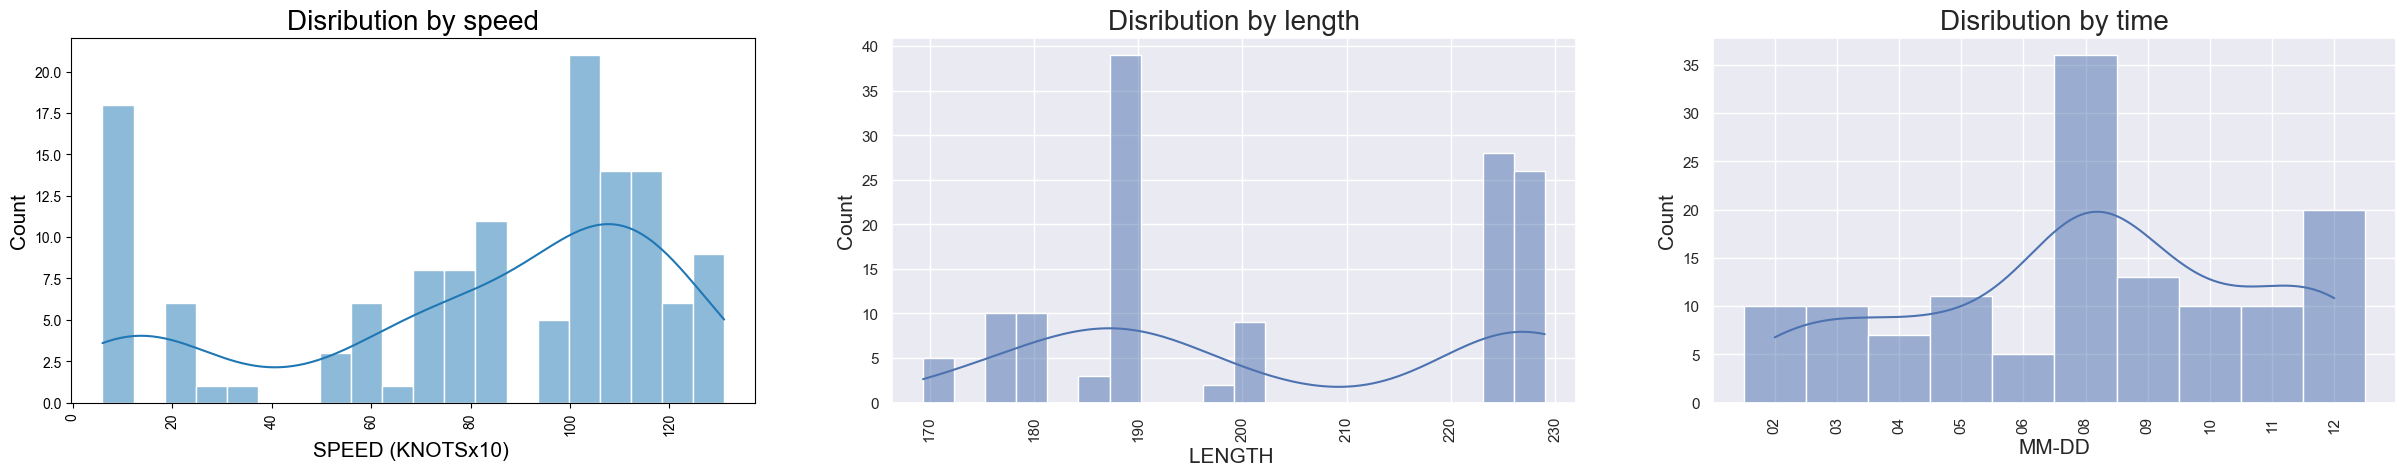

Cargo typeB


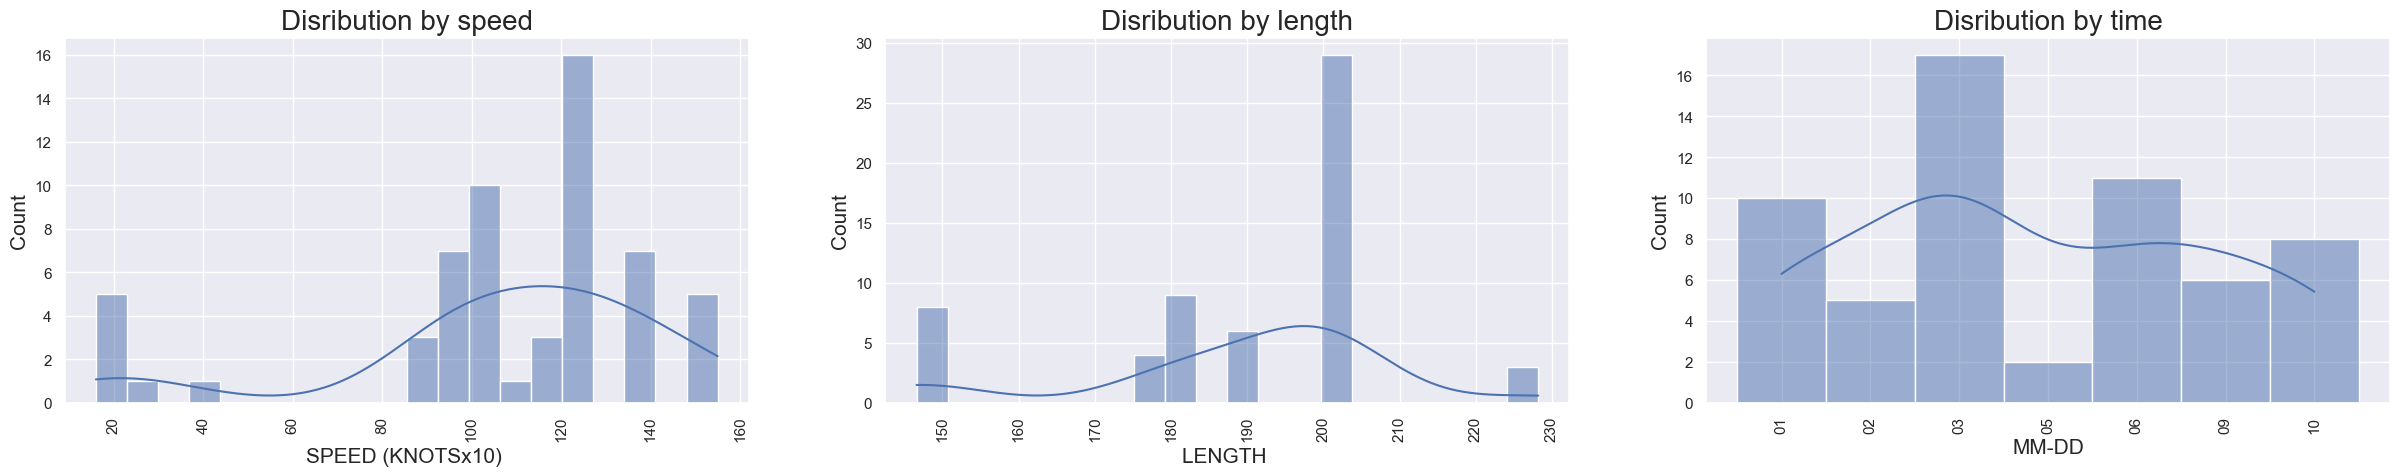

Recreational


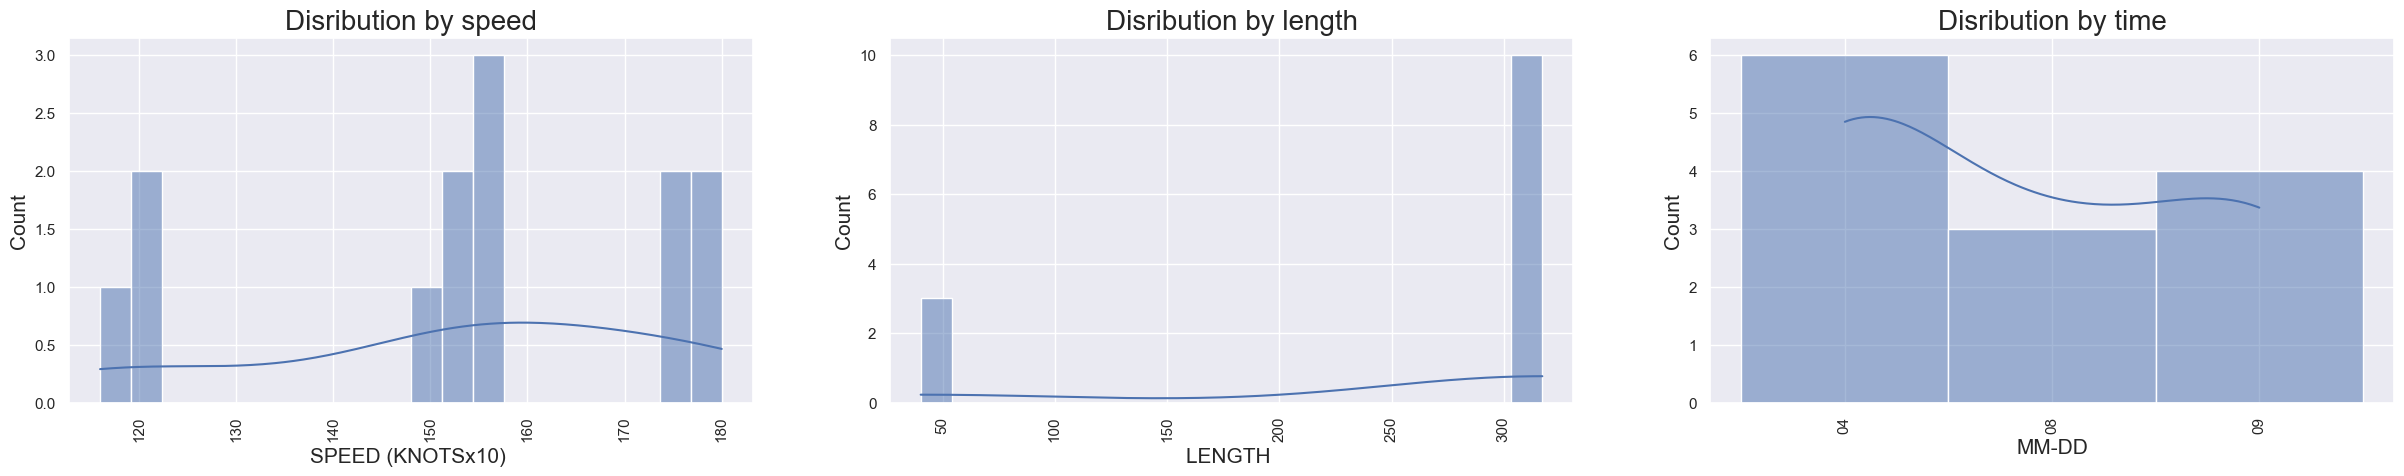

Cargo TypeC


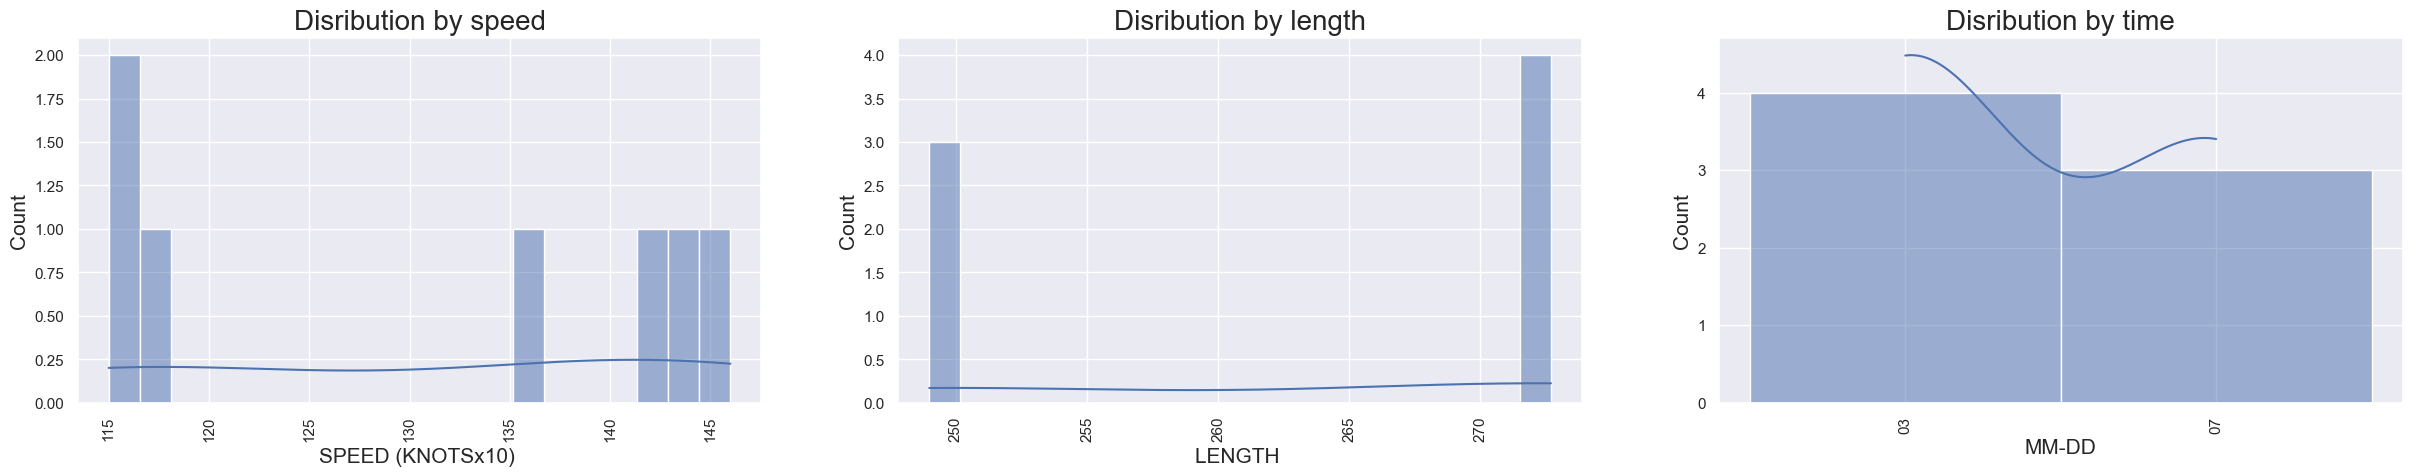

Fishing type


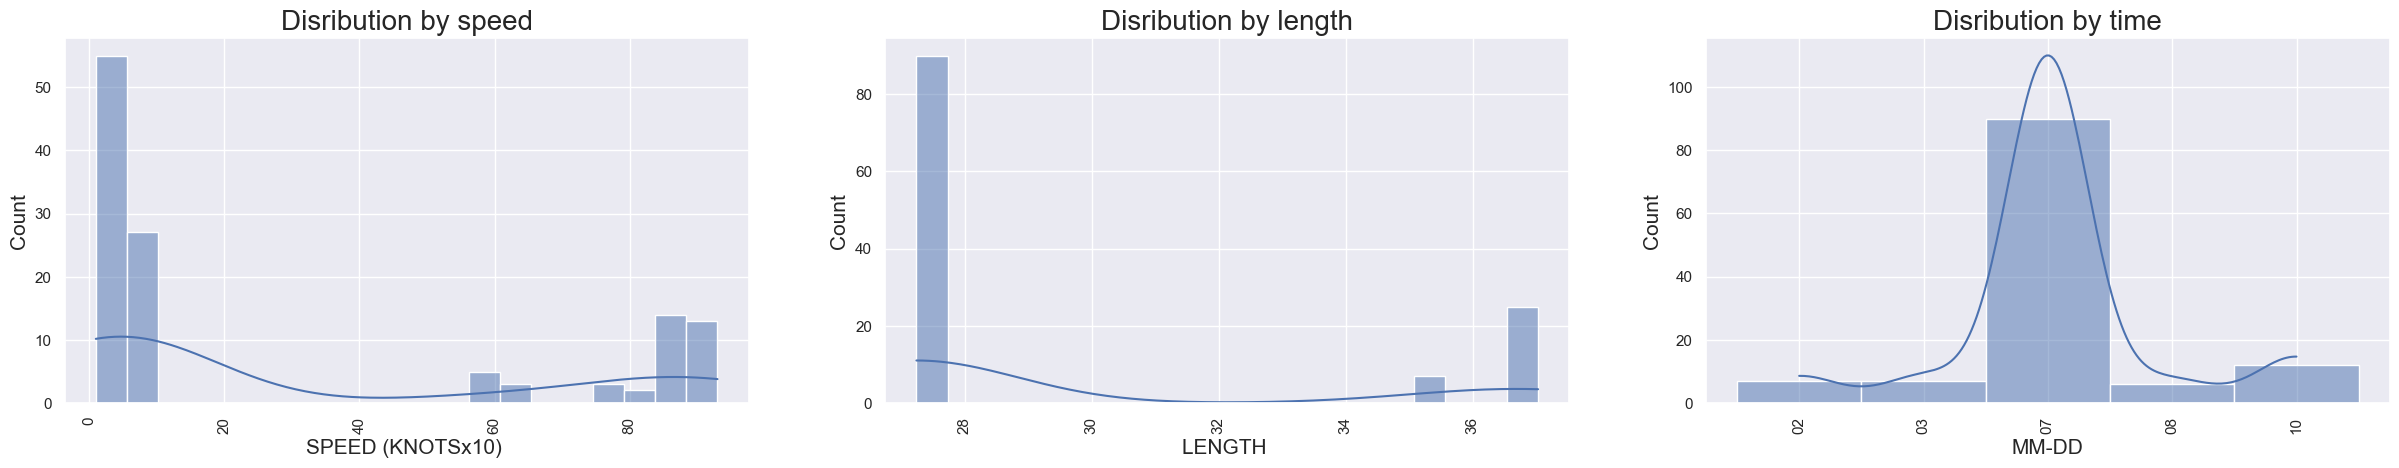

Research


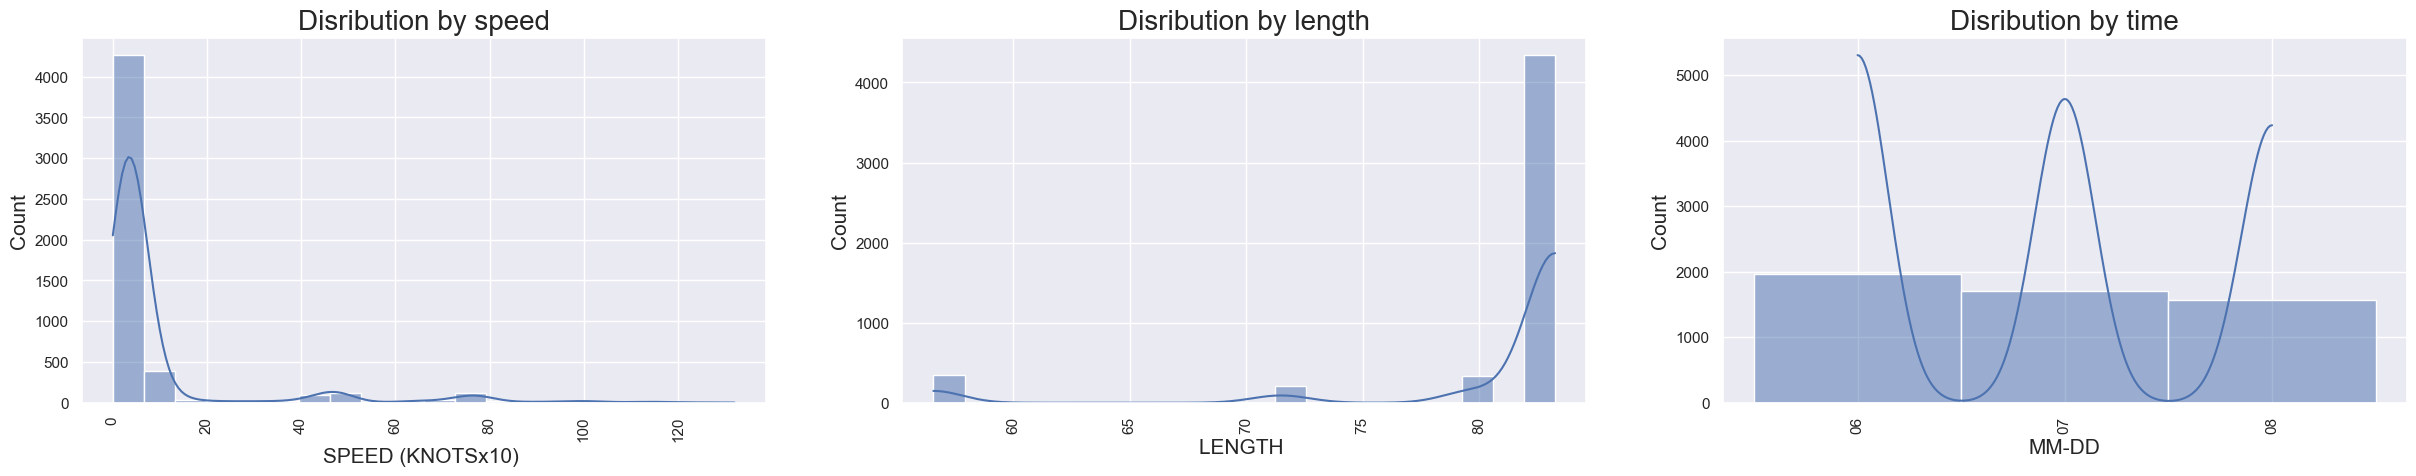

nan


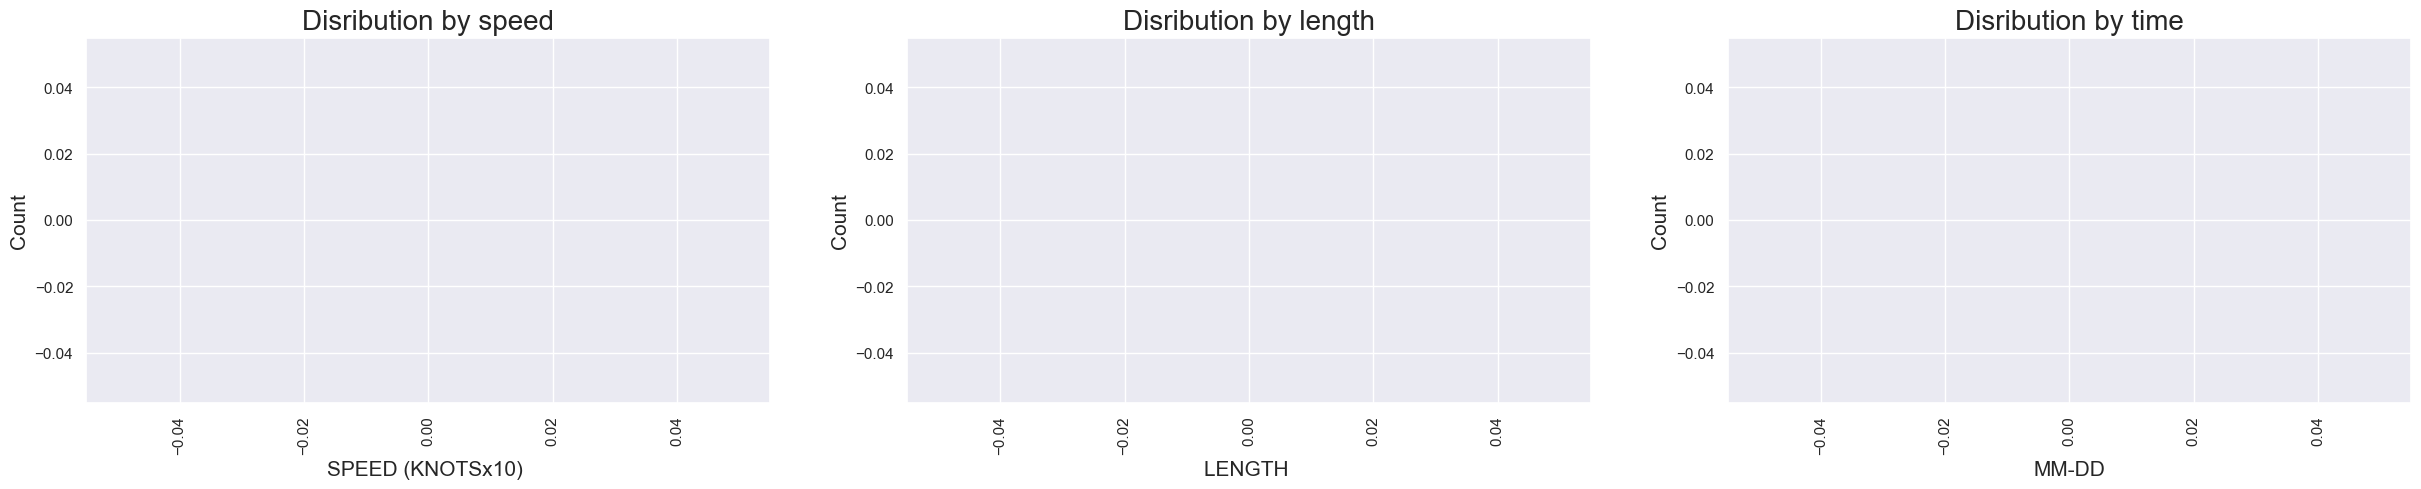

In [64]:
for vessel in list(isolated_ais_axial.group4.unique()):
        
    print(vessel)
    temp_df2=isolated_ais_axial[isolated_ais_axial['group4']==vessel]
    distribution_speed_length_time(temp_df2)

    plt.show()

Cargo typeB


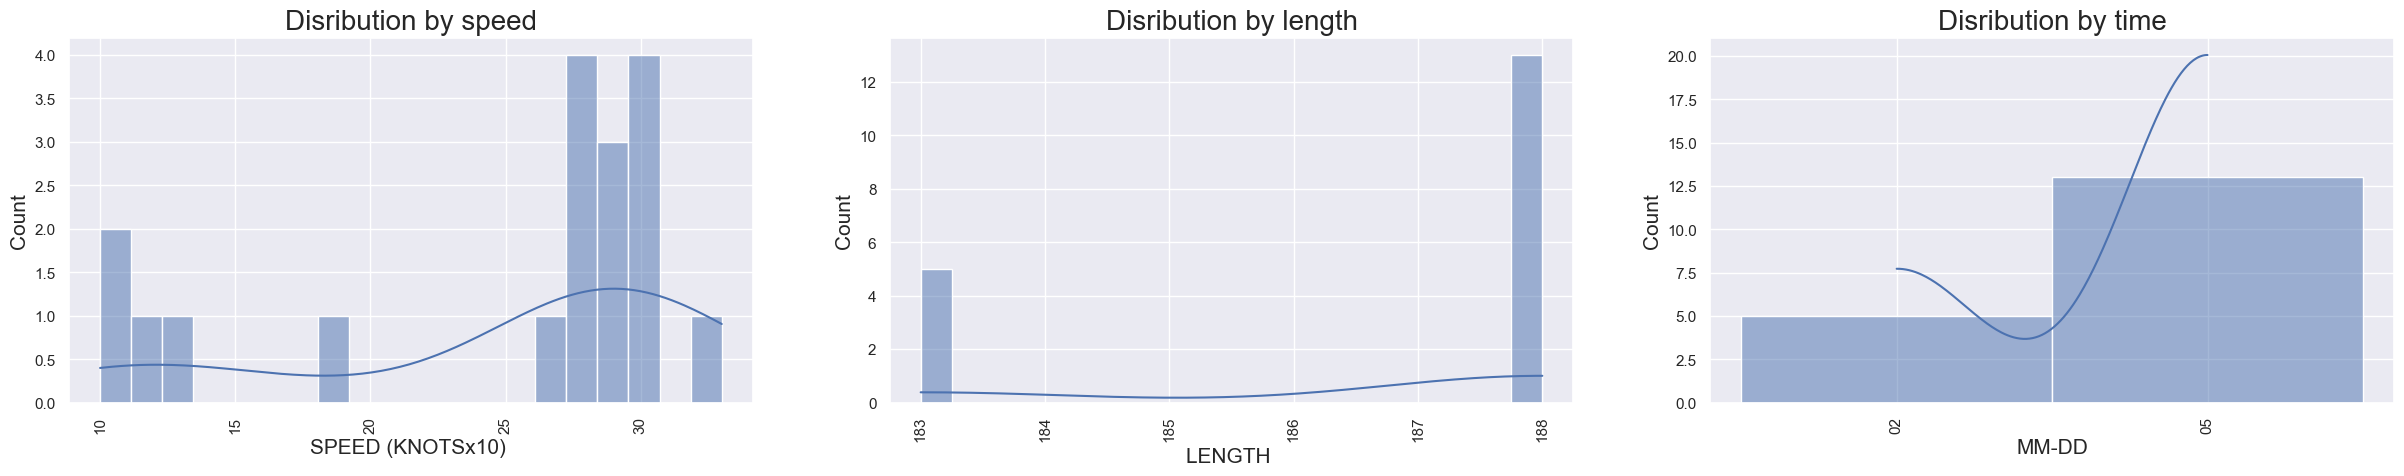

Fishing type


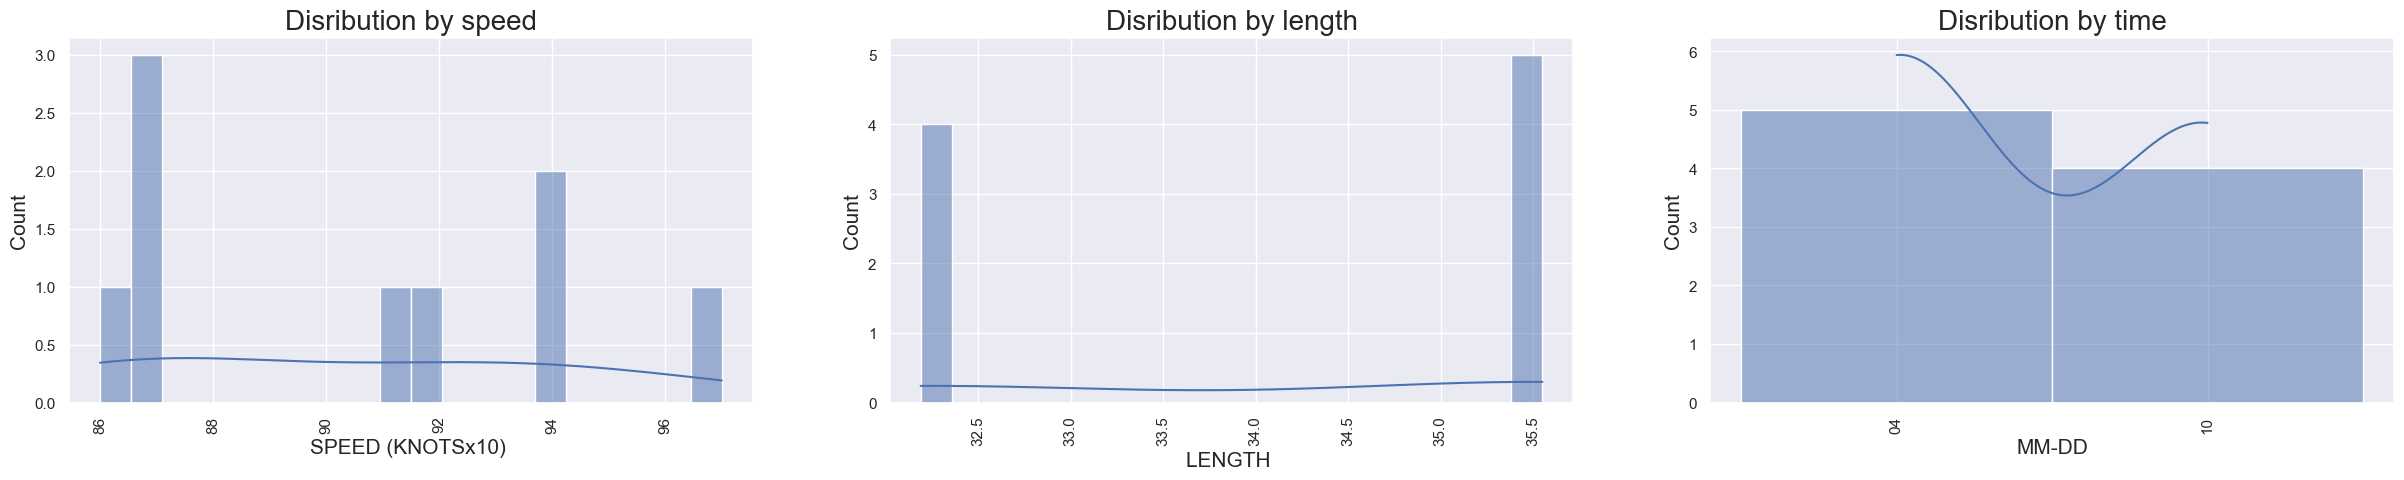

Cargo TypeC


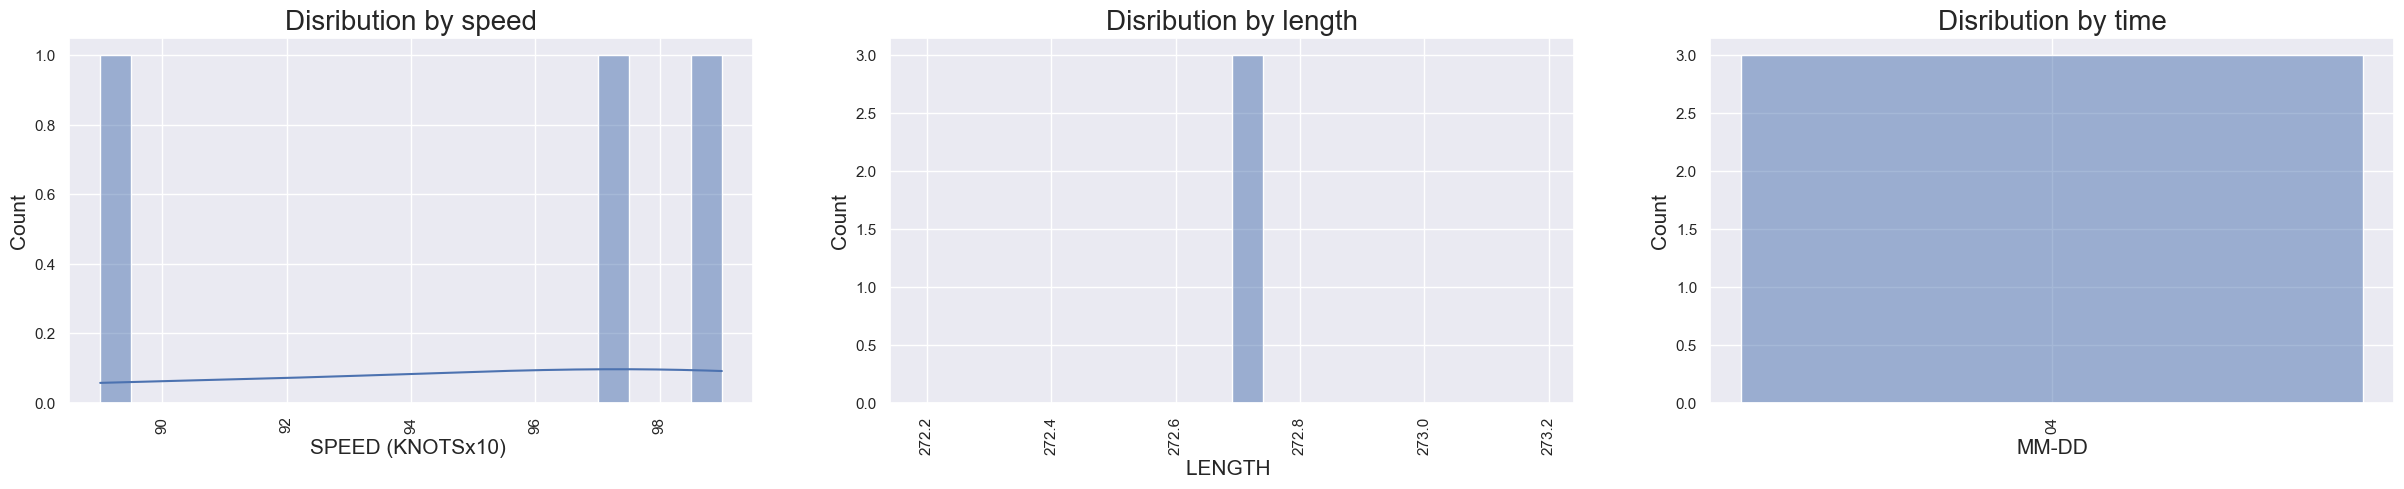

nan


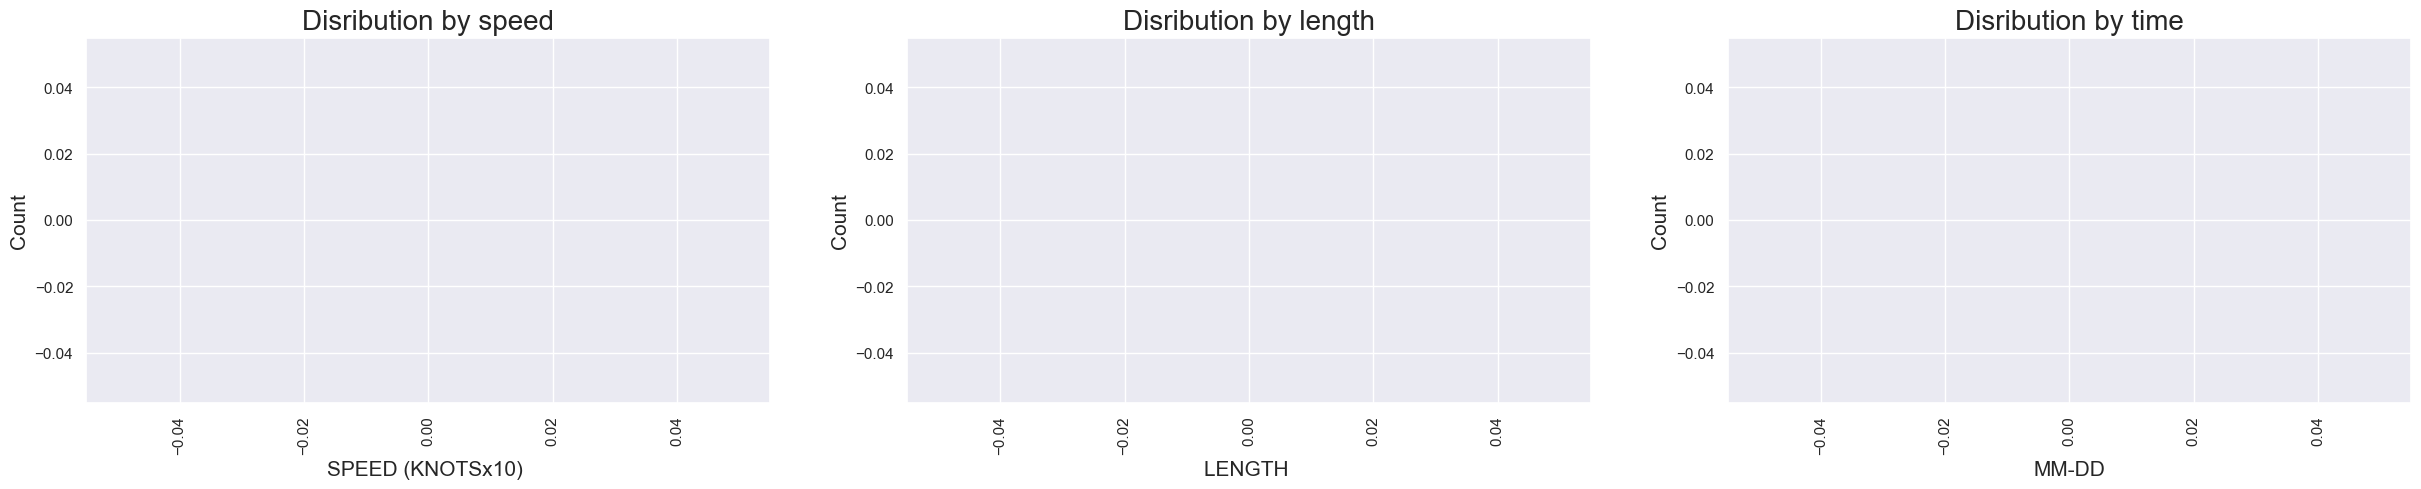

Research


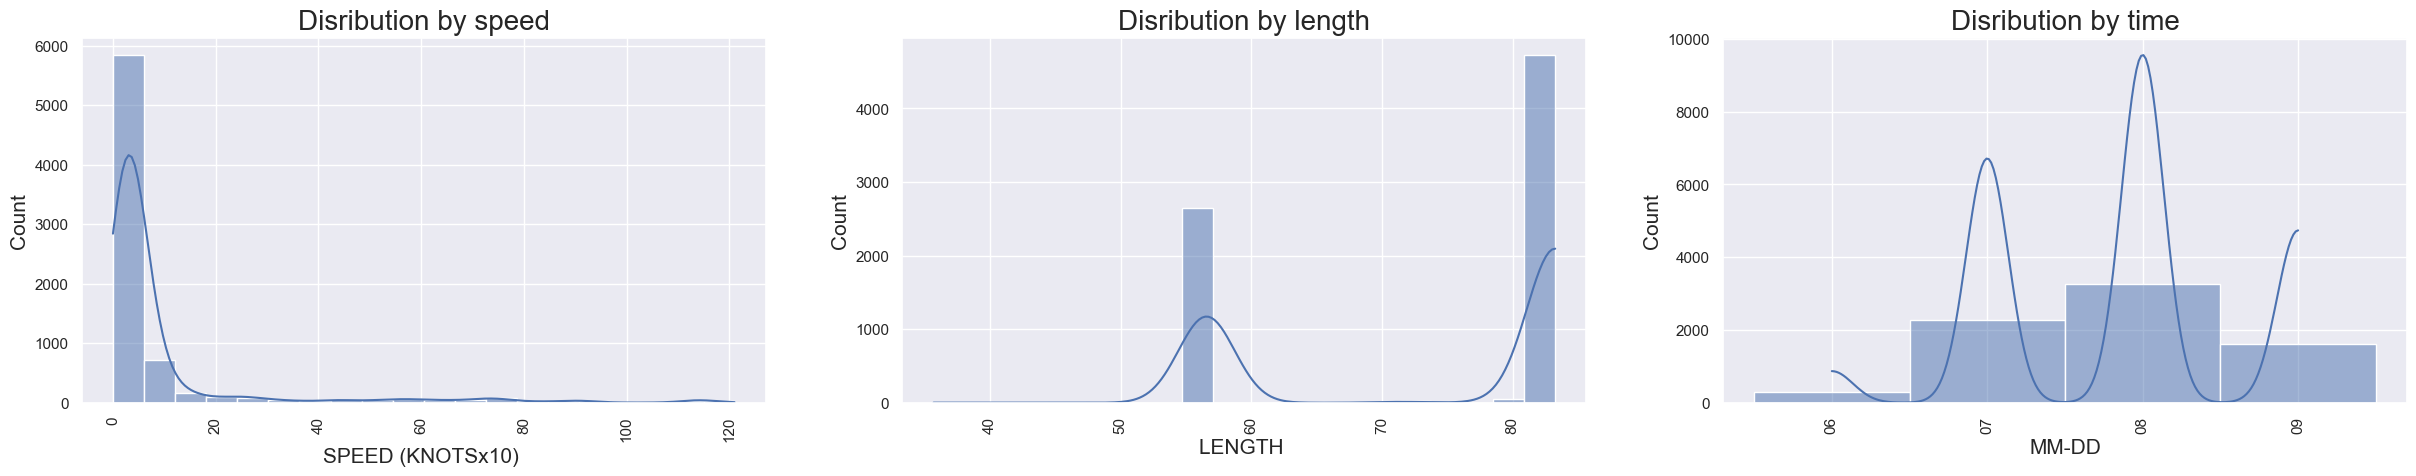

Cargo typeC


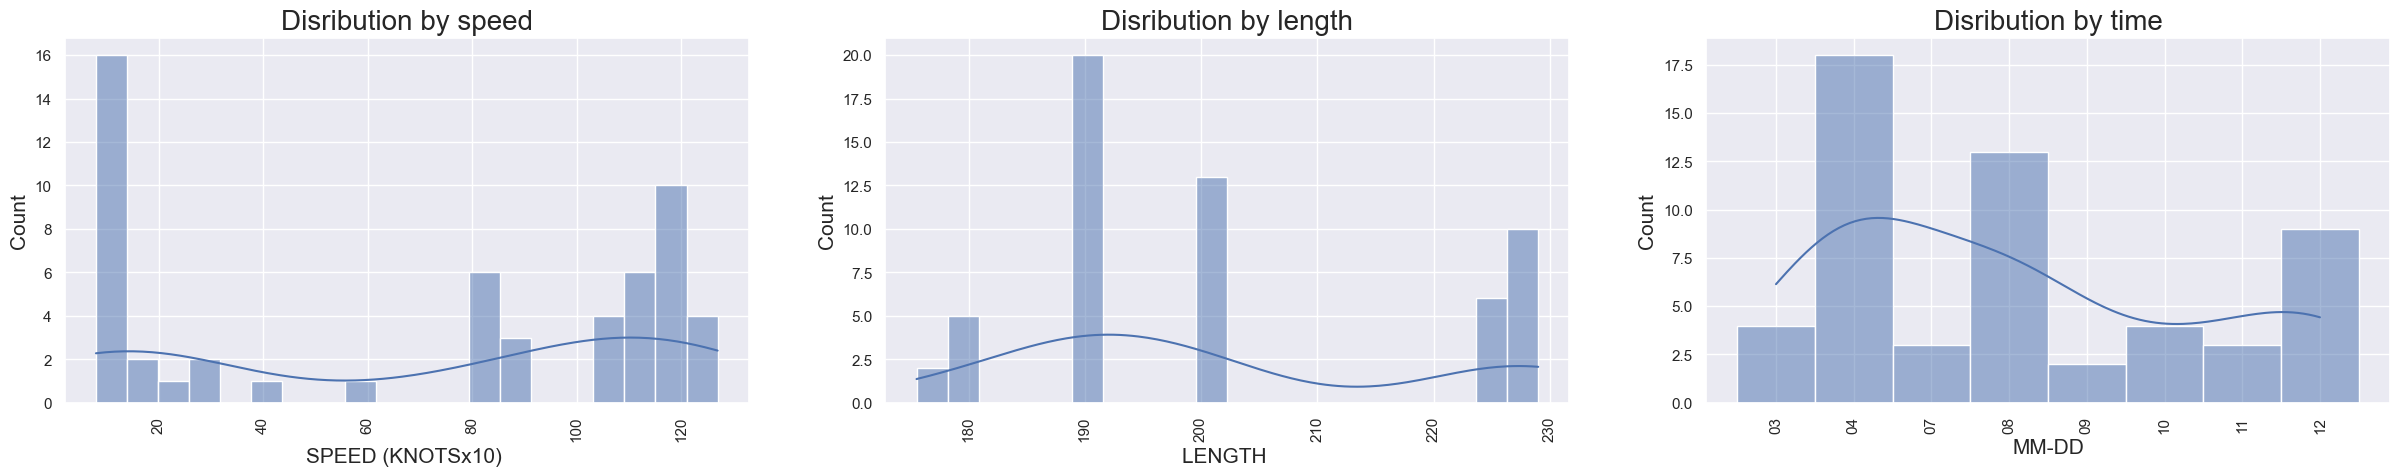

In [65]:
for vessel in list(isolated_ais_central.group4.unique()):
        
    print(vessel)
    temp_df2=isolated_ais_central[isolated_ais_central['group4']==vessel]
    distribution_speed_length_time(temp_df2)

    plt.show()

Cargo typeB


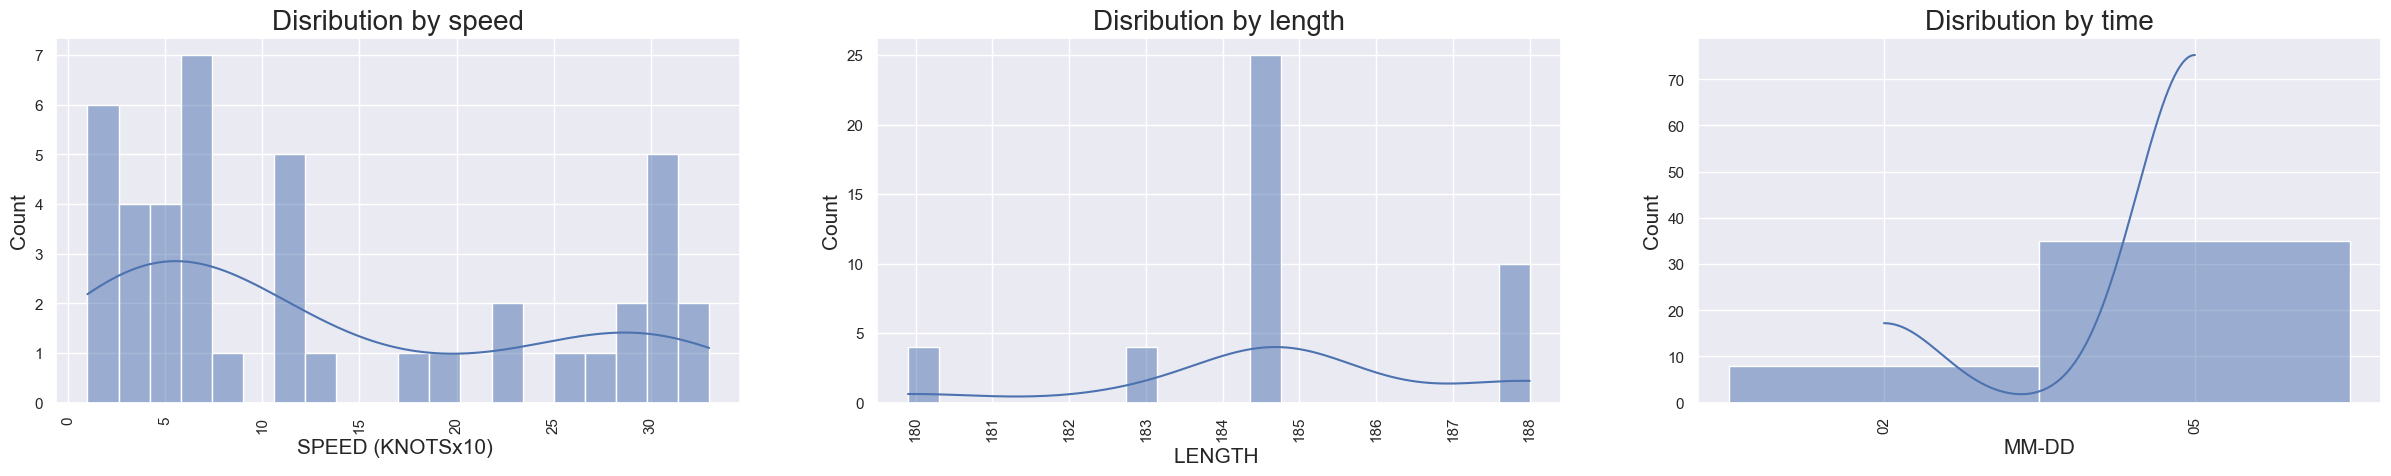

Cargo typeC


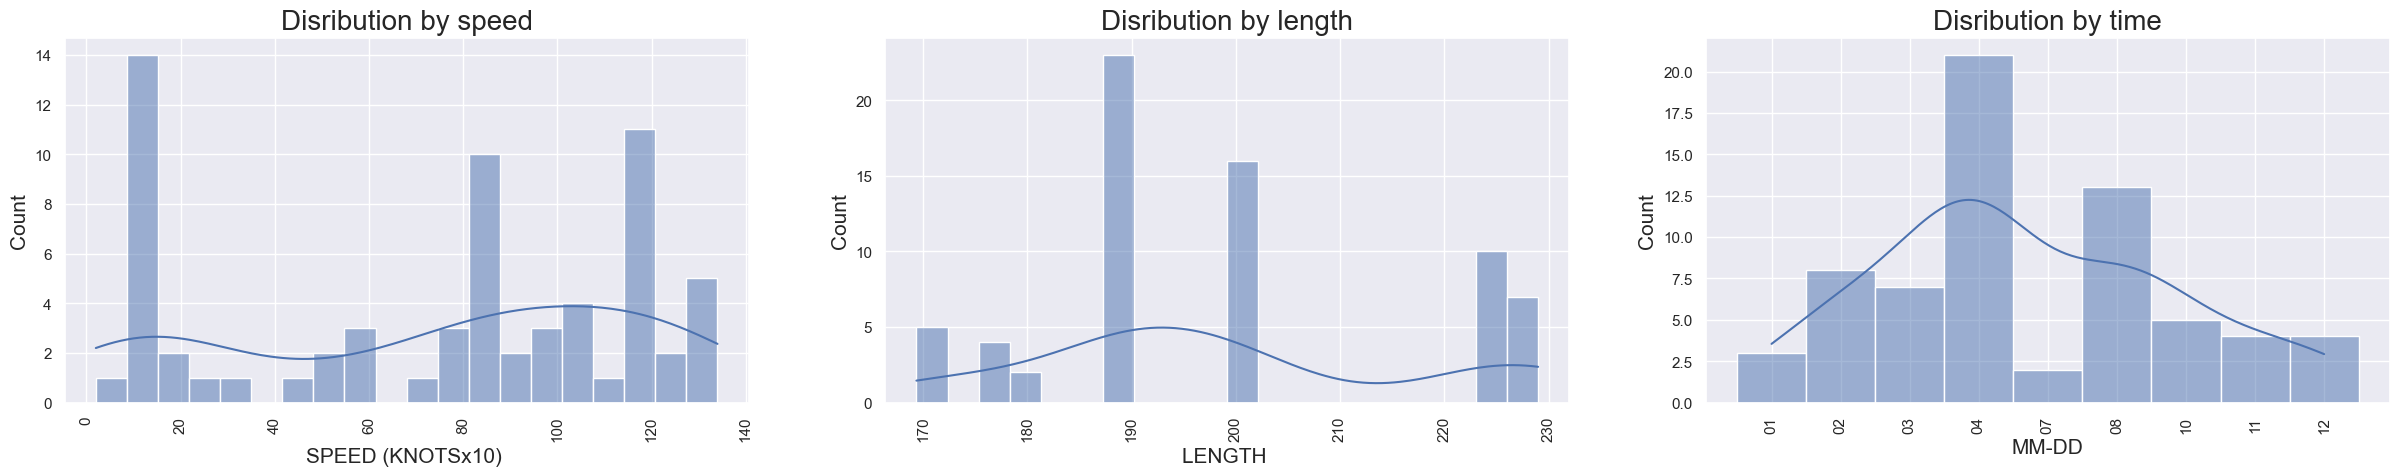

Fishing type


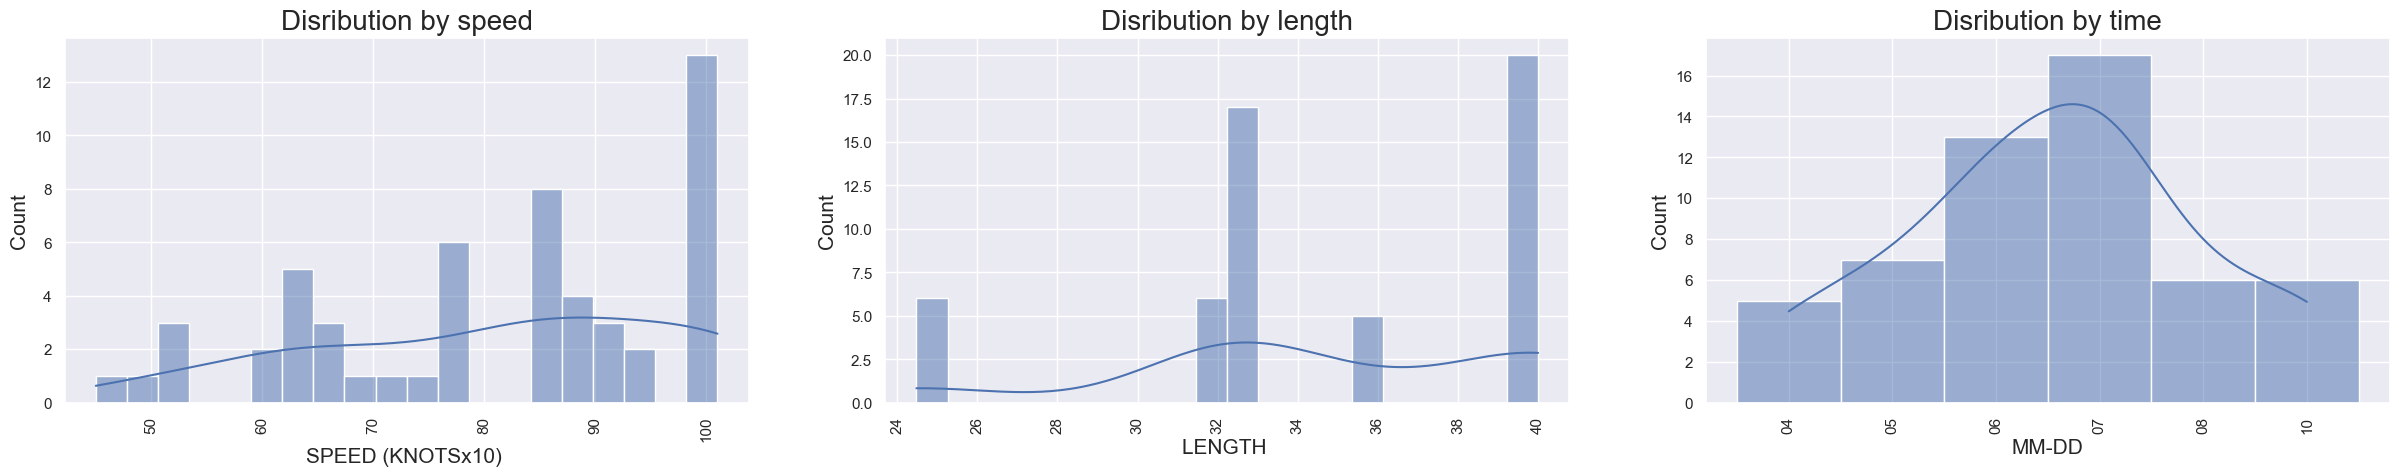

nan


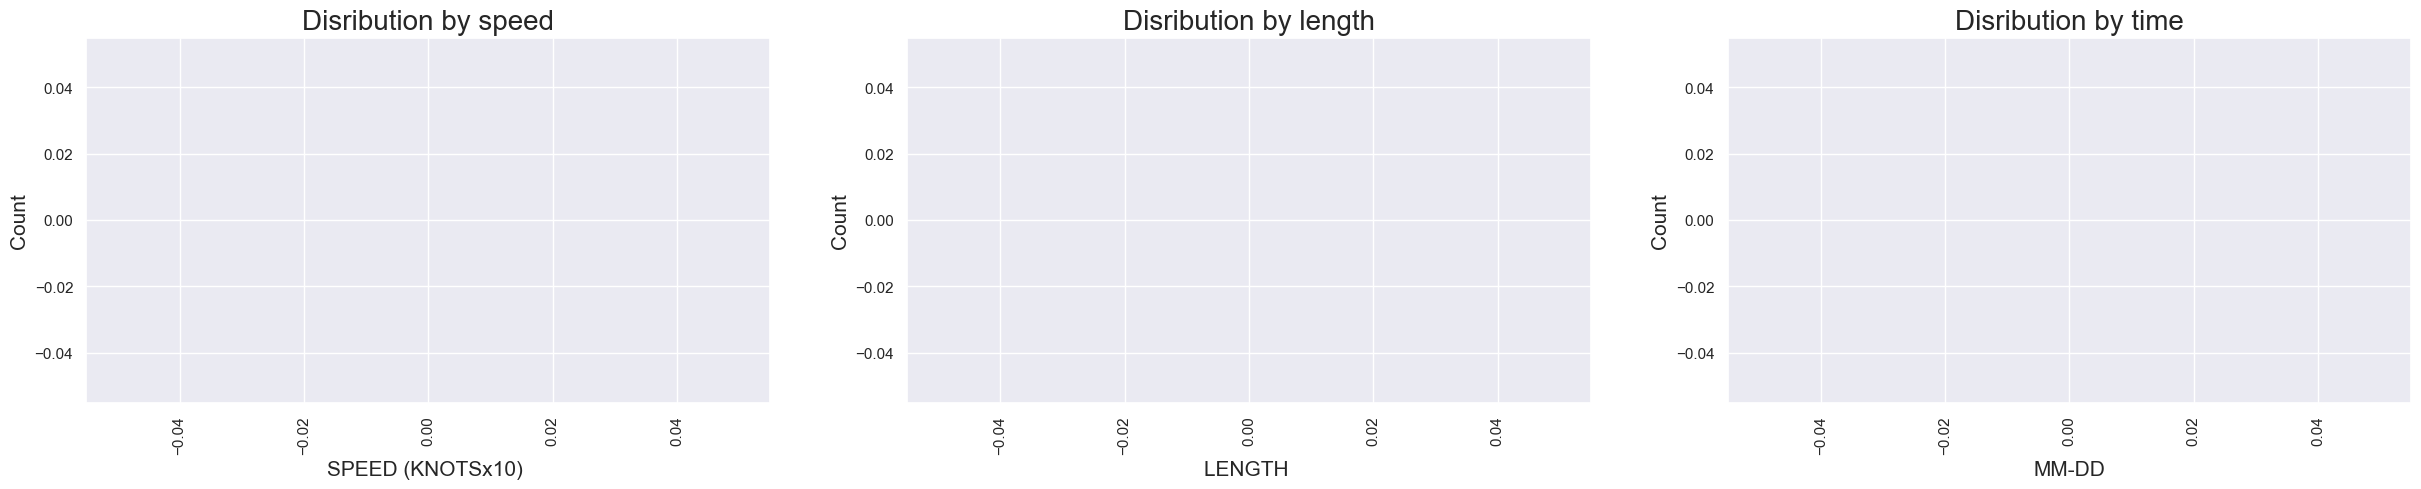

Research


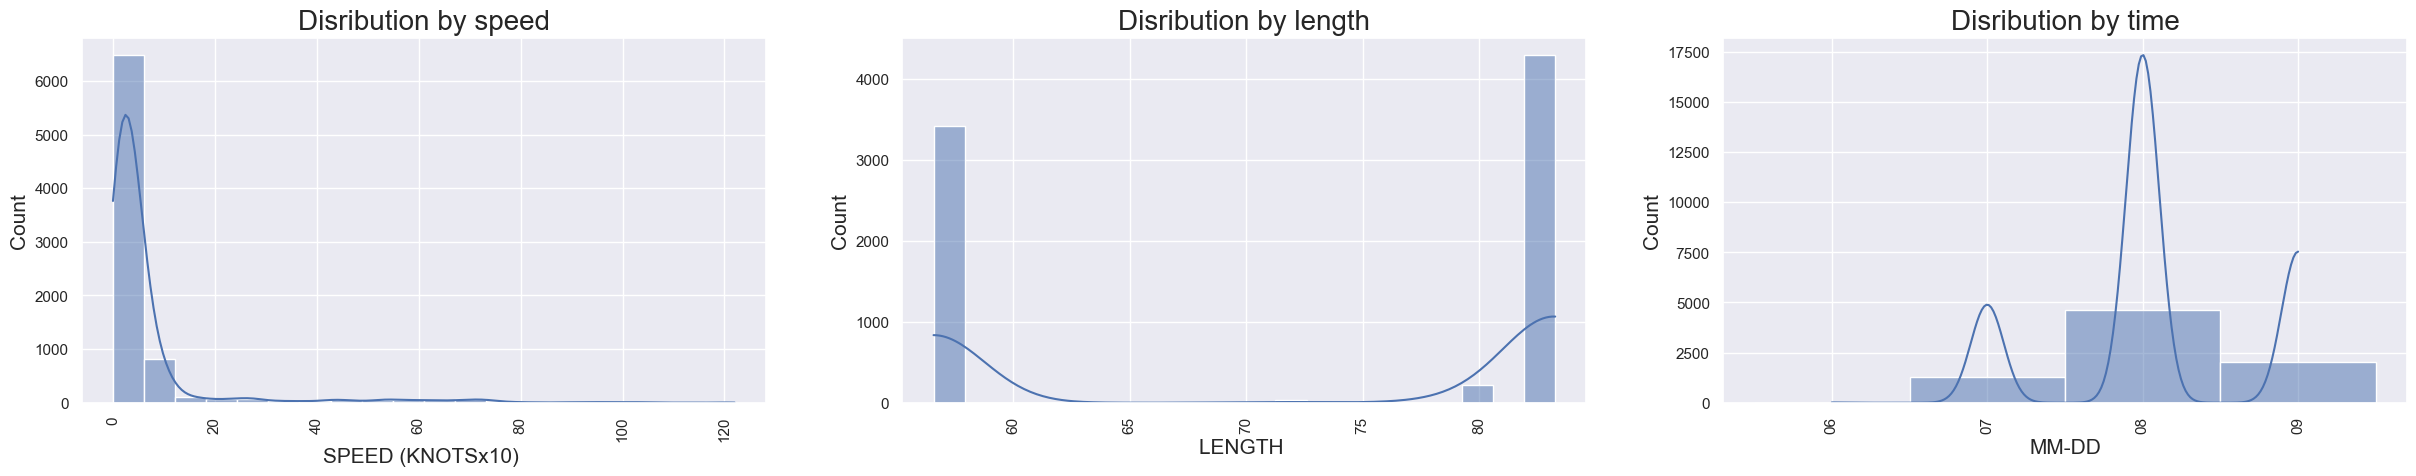

Cargo typeA


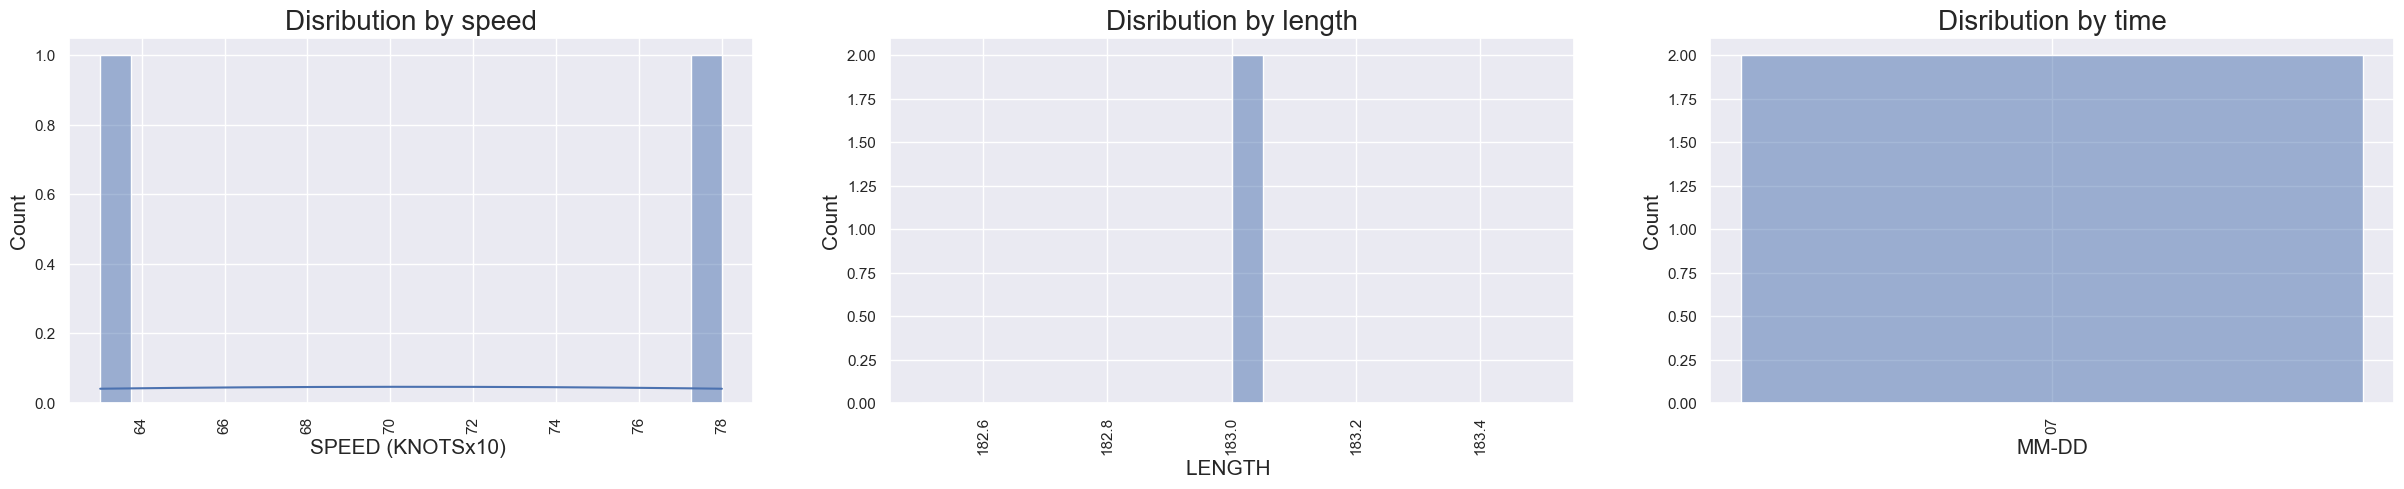

Cargo TypeC


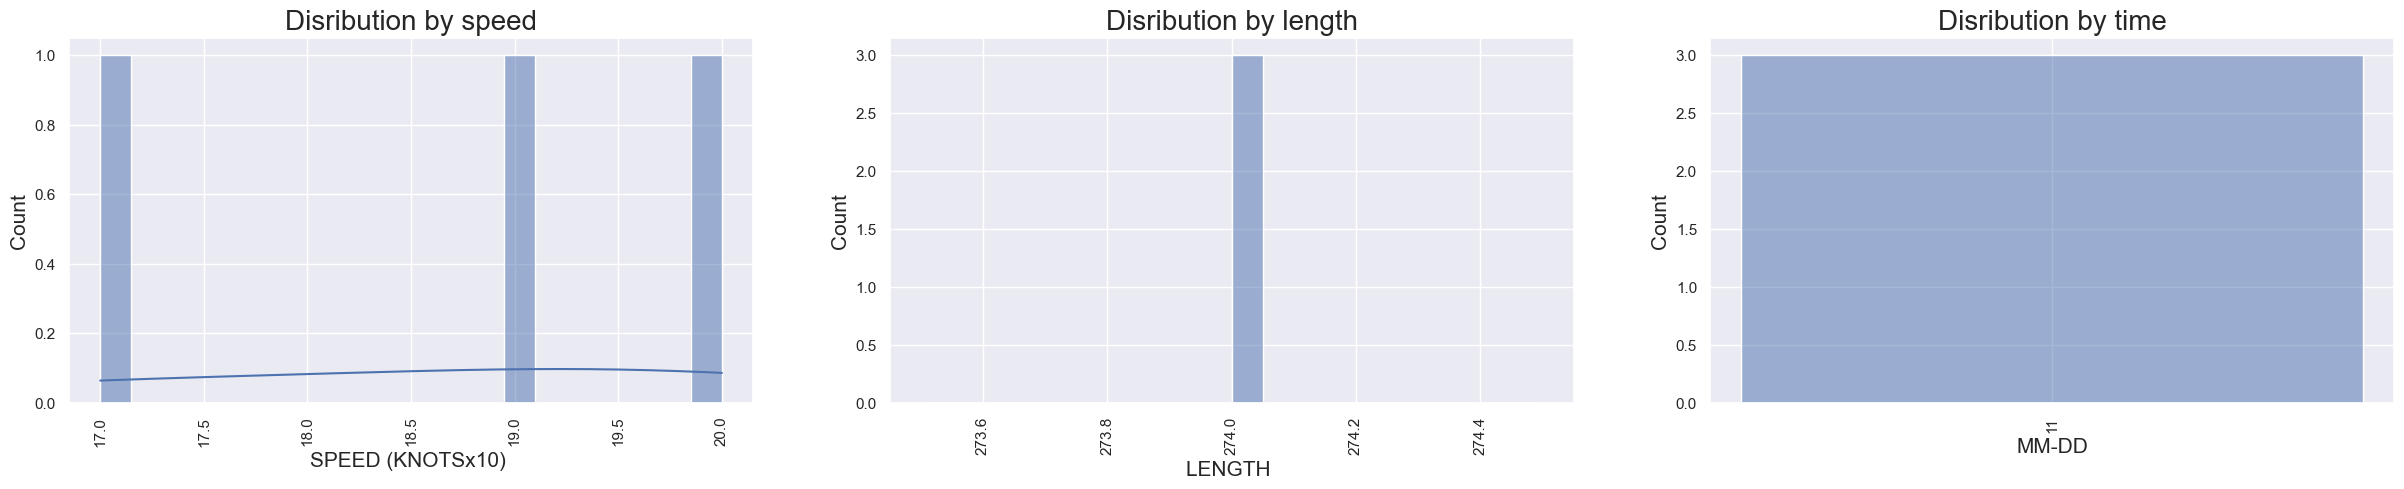

In [66]:
for vessel in list(isolated_ais_eastern.group4.unique()):
        
    print(vessel)
    temp_df2=isolated_ais_eastern[isolated_ais_eastern['group4']==vessel]
    distribution_speed_length_time(temp_df2)

    plt.show()

### Trying to parallelize the below operation

In [68]:
import spdf

In [69]:
reload(spdf)

<module 'spdf' from 'C:\\Users\\khirod\\Documents\\GitHub\\Ocean-data-analysis\\spdf.py'>

In [500]:
# spdf.plot_and_save_spdfs(isolated_ships_2,'VESSEL TYPE',save=True,plot=True,title='spdf')

In [73]:
isolated_ships_axial_2['hydrophone']=1

In [76]:
psds_dict=spdf.plot_and_save_spdfs_parallel(isolated_ships_axial_2,'group4',save_psd=True,plot=True,filename='spdf_axial',plot_path='SPDF_plots/Axial/')


 16%|█████████████                                                                  | 528/3206 [01:30<05:28,  8.16it/s]


 33%|█████████████████████████▋                                                    | 1056/3206 [02:35<08:34,  4.18it/s]


 49%|██████████████████████████████████████▌                                       | 1584/3206 [03:57<04:12,  6.41it/s]


 66%|███████████████████████████████████████████████████▍                          | 2112/3206 [05:19<01:55,  9.49it/s]


 82%|████████████████████████████████████████████████████████████████▏             | 2640/3206 [06:24<00:58,  9.61it/s]


 99%|█████████████████████████████████████████████████████████████████████████████ | 3168/3206 [07:29<00:04,  9.09it/s]


100%|██████████████████████████████████████████████████████████████████████████████| 3206/3206 [07:32<00:00,  7.08it/s]


455.2661340236664
failed
2019-06-08 19:06:28
2019-06-08 19:16:28



100%|██████████████████████████████████████████████████████████████████████████████| 513/513 [00:00<00:00, 1134.65it/s]


Cargo typeC



100%|██████████████████████████████████████████████████████████████████████████████| 513/513 [00:00<00:00, 1158.33it/s]


Cargo typeB



100%|██████████████████████████████████████████████████████████████████████████████| 513/513 [00:00<00:00, 1179.18it/s]


Recreational



100%|██████████████████████████████████████████████████████████████████████████████| 513/513 [00:00<00:00, 1202.75it/s]


Cargo TypeC



100%|██████████████████████████████████████████████████████████████████████████████| 513/513 [00:00<00:00, 1165.86it/s]


Fishing type



100%|███████████████████████████████████████████████████████████████████████████████| 513/513 [00:00<00:00, 663.82it/s]


Research


In [73]:
isolated_ships_central_2['hydrophone']=2

In [ ]:
psds_dict=spdf.plot_and_save_spdfs_parallel(isolated_ships_central_2,'group4',save_psd=True,plot=True,filename='spdf_axial',plot_path='SPDF_plots/Axial/')


  3%|██▌                                                                            | 104/3206 [00:10<06:26,  8.02it/s]